In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Read file with returns from 100 stocks
- Assign number to each one of the stocks
- Remove first column representing the date

In [82]:
df_stocks_returns = pd.read_table("100_stocks_returns.txt", sep = " ", names = np.arange(101))
df_stocks_returns.drop(0, axis = 1, inplace = True)
df_stocks_returns.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,2.1276,-2.3370,-1.2280,-2.6984,-1.7699,2.2134,-4.5496,-1.6598,-2.2403,0.4053,...,-2.7823,0.2251,-0.8488,1.1879,3.0036,0.5386,0.6380,-0.4006,1.0496,3.9856
1,4.8658,6.0631,0.1639,7.2770,1.1769,2.3169,0.7068,1.3503,-0.3678,1.5859,...,5.0300,7.0651,6.5539,4.9193,5.9252,4.7108,4.0692,5.4019,6.5694,8.2962
2,-0.9962,-2.3301,-0.5921,-2.5245,-1.8076,0.8903,1.9394,1.1314,-3.3908,-0.1959,...,-0.2978,-1.2447,-0.5466,-1.1210,-3.2242,-2.8977,0.1279,1.1137,-0.5205,-1.8119
3,0.6441,2.1924,2.9654,-2.0956,-1.7827,4.8031,0.7487,3.9617,-0.3635,-1.1110,...,2.6970,1.0780,0.7655,1.5320,0.4140,0.2659,3.5241,6.5133,11.3120,11.4192
4,-3.6040,-3.4157,2.1402,-1.5655,-2.2487,-5.1347,-3.8505,-4.0434,-2.6483,-1.8196,...,2.3890,-1.1899,-1.7024,-0.8322,-1.9991,-0.7021,2.2096,-1.3830,-6.5086,2.4425


In [83]:
means = df_stocks_returns.mean()
cov = df_stocks_returns.cov()

In [84]:
def mahalanobis_distance(y, x, cov):
    return y @ np.linalg.inv(cov) @ x

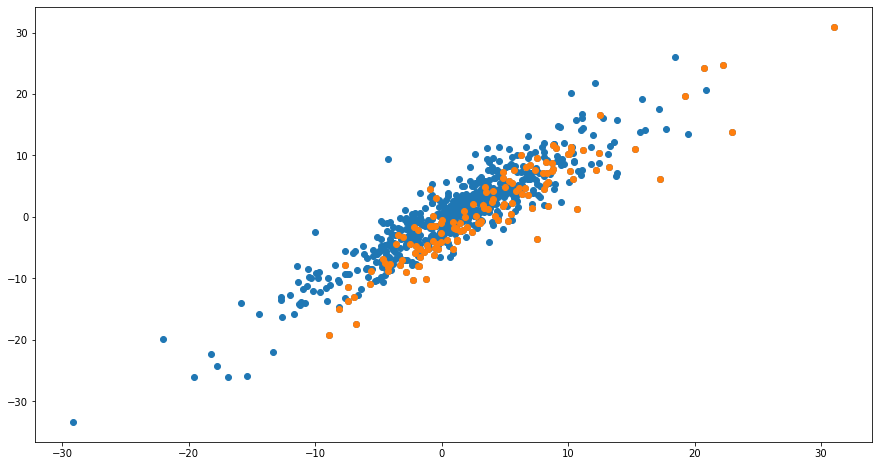

In [87]:
dist = df_stocks_returns.apply(lambda x: mahalanobis_distance(x, means, cov), axis = 1)

p80 = np.percentile(dist, 80)
outliers_ind = df_stocks_returns.index[dist >= p80]

plt.figure(figsize=(15,8))
plt.scatter(df_stocks_returns[2], df_stocks_returns[10])
plt.scatter(df_stocks_returns[2][outliers_ind], df_stocks_returns[10][outliers_ind])
plt.show()

In [80]:
from sklearn.covariance import LedoitWolf
cov_LW = LedoitWolf().fit(df_stocks_returns.loc[:,1:100]).covariance_

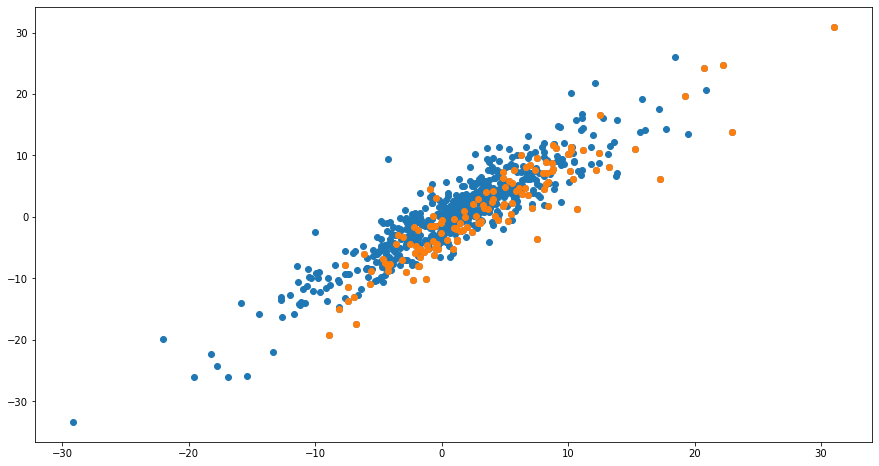

In [90]:
dist_LW = df_stocks_returns.apply(lambda x: mahalanobis_distance(x, means, cov_LW), axis = 1)

p80 = np.percentile(dist_LW, 80)
outliers_ind_LW = df_stocks_returns.index[dist_LW >= p80]

plt.figure(figsize=(15,8))
plt.scatter(df_stocks_returns[2], df_stocks_returns[10])
plt.scatter(df_stocks_returns[2][outliers_ind_LW], df_stocks_returns[10][outliers_ind_LW])
plt.show()